**Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import random
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
tf.random.set_seed(42)
from nlp_model_text_preprocessing import index_the_words, text_to_sequence, pad_sequences, one_hot_encoding, index_the_char, text_to_sequence_char, char_sequence_to_text, word_sequence_to_text
from english_text_normalization import text_normalization
from deep_learning import nlp_model_word, nlp_model_char, model_compile_word, model_compile_char, model_fit, plot_word_model_change, plot_char_model_change
from model_testing import model_testing_char, model_testing_word
from transformers_models import load_dataset, data_collator, train_arguments, training_, save_model_tokenizer, transformer_testing,transformes_model
from read_data import read_file
from generate_train_label import generate_train_label_word, generate_train_label_char
from model_check_point import check_point
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

**Ignore Warnings**

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

**Read Data**

In [ ]:
Corpus = read_file(file_path="The Alchemist.txt", text_normalization=text_normalization)
len(Corpus)

3668

In [ ]:
with open('Cleaned_Corpus.txt', 'w') as f:
    for line in Corpus:
        f.write(line + '\n')

**Generate Early Stop Depending On Value Of Loss**

In [ ]:
early_stop_ = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

**1-Tokens Based On Word**

In [ ]:
# Generate Word To Index, Index To Word, And Find Count Of All Words
all_words, words_index, index_to_words = index_the_words(Corpus)
all_words

3382

In [ ]:
max_length_word, train, labels = generate_train_label_word(Corpus, text_to_sequence, words_index, pad_sequences)
max_length_word

24

In [ ]:
# Convert Label Data
label = one_hot_encoding(labels, all_words)
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Deep Learning Models*

Epoch 1/150
1100/1100 [==============================] - 18s 15ms/step - loss: 6.0076 - accuracy: 0.0973
Epoch 2/150
1100/1100 [==============================] - 17s 15ms/step - loss: 5.3767 - accuracy: 0.1396
Epoch 3/150
1100/1100 [==============================] - 16s 15ms/step - loss: 4.9802 - accuracy: 0.1681
Epoch 4/150
1100/1100 [==============================] - 15s 13ms/step - loss: 4.6828 - accuracy: 0.1880
Epoch 5/150
1100/1100 [==============================] - 14s 13ms/step - loss: 4.4420 - accuracy: 0.2026
Epoch 6/150
1100/1100 [==============================] - 14s 12ms/step - loss: 4.2345 - accuracy: 0.2175
Epoch 7/150
1100/1100 [==============================] - 14s 13ms/step - loss: 4.0406 - accuracy: 0.2301
Epoch 8/150
1100/1100 [==============================] - 15s 13ms/step - loss: 3.8583 - accuracy: 0.2439
Epoch 9/150
1100/1100 [==============================] - 14s 13ms/step - loss: 3.6841 - accuracy: 0.2596
Epoch 10/150
1100/1100 [==============================]

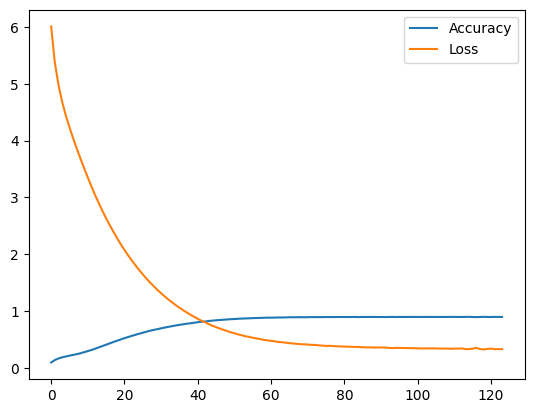

In [ ]:
# 1-LSTM
english_lstm_check_point_1 = check_point('English_Lstm_1')
lstm_model = tf.keras.layers.LSTM(units=128, return_sequences=False)
LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = lstm_model)
model_compile_word(model =LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=english_lstm_check_point_1 ,batch_size=32)
plot_word_model_change(history=history)

Epoch 1/150
550/550 [==============================] - 16s 24ms/step - loss: 6.0428 - accuracy: 0.0967
Epoch 2/150
550/550 [==============================] - 12s 22ms/step - loss: 5.4588 - accuracy: 0.1327
Epoch 3/150
550/550 [==============================] - 12s 22ms/step - loss: 5.0983 - accuracy: 0.1595
Epoch 4/150
550/550 [==============================] - 12s 22ms/step - loss: 4.8129 - accuracy: 0.1793
Epoch 5/150
550/550 [==============================] - 12s 22ms/step - loss: 4.5993 - accuracy: 0.1951
Epoch 6/150
550/550 [==============================] - 12s 21ms/step - loss: 4.4232 - accuracy: 0.2057
Epoch 7/150
550/550 [==============================] - 12s 22ms/step - loss: 4.2650 - accuracy: 0.2155
Epoch 8/150
550/550 [==============================] - 12s 21ms/step - loss: 4.1187 - accuracy: 0.2262
Epoch 9/150
550/550 [==============================] - 12s 22ms/step - loss: 3.9831 - accuracy: 0.2383
Epoch 10/150
550/550 [==============================] - 12s 21ms/step - l

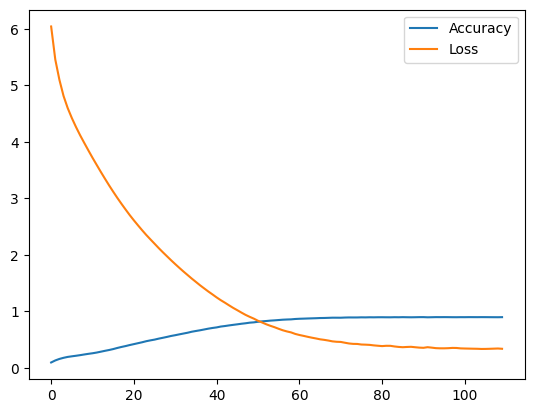

In [ ]:
# 2-Bidirectional LSTM
english_bidirectional_lstm_check_point_1 = check_point('English_Bidirectional_1')
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = bidirectional_lstm_model)
model_compile_word(model =Bidirectional_LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=Bidirectional_LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=english_bidirectional_lstm_check_point_1, batch_size=64)
plot_word_model_change(history=history)

Epoch 1/150
1100/1100 [==============================] - 16s 12ms/step - loss: 5.8326 - accuracy: 0.1192
Epoch 2/150
1100/1100 [==============================] - 13s 12ms/step - loss: 4.9923 - accuracy: 0.1691
Epoch 3/150
1100/1100 [==============================] - 13s 11ms/step - loss: 4.6222 - accuracy: 0.1922
Epoch 4/150
1100/1100 [==============================] - 13s 11ms/step - loss: 4.3190 - accuracy: 0.2110
Epoch 5/150
1100/1100 [==============================] - 13s 11ms/step - loss: 4.0419 - accuracy: 0.2303
Epoch 6/150
1100/1100 [==============================] - 13s 11ms/step - loss: 3.7816 - accuracy: 0.2515
Epoch 7/150
1100/1100 [==============================] - 13s 11ms/step - loss: 3.5340 - accuracy: 0.2759
Epoch 8/150
1100/1100 [==============================] - 13s 11ms/step - loss: 3.2987 - accuracy: 0.3056
Epoch 9/150
1100/1100 [==============================] - 13s 11ms/step - loss: 3.0778 - accuracy: 0.3343
Epoch 10/150
1100/1100 [==============================]

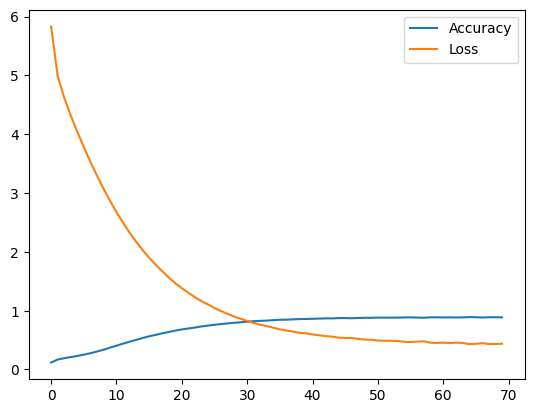

In [ ]:
# 3-GRU
english_gru_check_point_1 = check_point('English_GRU1')
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = gru_model)
model_compile_word(model =GRU_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=GRU_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=english_gru_check_point_1 , batch_size=32)
plot_word_model_change(history=history)

*Testing The Model*

In [ ]:
# 1-LSTM
model_testing_word(text = 'The boy was surprised ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='English_Lstm_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'The boy was surprised at the point people because he had been a sea he was stronger and he was reading if he worked yes space us taught him to personal desires those can suffer at the sun they entered the sea think about the desert his life show the that morning he had'

In [ ]:
# 2-Bidirectional LSTM
model_testing_word(text = 'He decided', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='English_Bidirectional_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'He decided to become them forget the hidden during a days in the desert they had been they two days in it face it had there had met before past hours would sound in just as these things were just force that when he died when when these things he gave to'

In [ ]:
# 3-GRU
model_testing_word(text = 'The only things', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='English_GRU1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'The only things we should have to die tomorrow said the alchemist when he was asked one day after he would find his treasure it was with his fact but the king of salem had to be something later i dont know how to turn them into the wind the boy saw that'

**2-Token Based On Character**

In [ ]:
# Generate Char To Index, Index To Char, And Find Count Of All Char
all_chars, chars_index, index_chars = index_the_char(Corpus)
all_chars

30

In [ ]:
chars_index

{' ': 0,
 '.': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 '—': 28,
 '’': 29,
 'UNK': 30}

In [ ]:
# Find The Max Length
max_length_char = max([len(s) for s in Corpus])
max_length_char

123

In [ ]:
# Generate Train And Label Data
Train, Label = generate_train_label_char(Corpus, max_length_char)

In [ ]:
len(Train)

201070

In [ ]:
# Convert Words Into Number
sequence_text_char_Train = text_to_sequence_char(chars_index, Train)
sequence_text_char_Label = text_to_sequence_char(chars_index, Label)

In [ ]:
# Padding The The Input Sequence To Make All Sequence In Same Length
Train = pad_sequences(input_sequence=sequence_text_char_Train, max_length=max_length_char, padding='post')
# # Convert The Label Data
Label = one_hot_encoding(sequence_text_char_Label, all_chars)

**Deep Learning Model**

In [ ]:
# 1-LSTM
english_lstm_check_point_2 = check_point('English_Bidirectional_2')
lstm_model = tf.keras.layers.LSTM(units= 128, return_sequences=False)
LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = lstm_model, input_length=max_length_char)
model_compile_char(model =LSTM_2, optiizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, checkpoint=english_lstm_check_point_2, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 2-Bidirectional_LSTM
english_bidirectional_lstm_check_point_2 = check_point('English_Bidirectional_2')
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = bidirectional_lstm_model, input_length=max_length_char)
model_compile_char(model =Bidirectional_LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=Bidirectional_LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, checkpoint=english_bidirectional_lstm_check_point_2 batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 3-GRU
english_gru_check_point_2 = check_point('English_GRU_2')
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = gru_model, input_length=max_length_char)
model_compile_char(model =GRU_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=GRU_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, checkpoint=english_gru_check_point_2,  batch_size=32)
plot_char_model_change(history=history)

**Model Testing**

In [ ]:
# 1-LSTM
model_testing_char(text = 'The people', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 2-Bidirectional LSTM
model_testing_char(text = "The people", number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = Bidirectional_LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 3-GRU
model_testing_char(text = "The people", number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = GRU_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

**3-Transformers**

In [4]:
# Transformers Model Name
import torch
model_name_ = 'gpt2'
# Model And Tokenizer For Transformers
tokenizer, model = transformes_model(model_name_)
# Data Used For Train Transformers
train_dataset = load_dataset('Cleaned_Corpus.txt', tokenizer)
# Convert Data Into Batches
collator = data_collator(tokenizer)
# Set Arguments For Train The Transformers
train_args = train_arguments(epochs = 70)
# Train The Transformers
training_(model=model, training_args=train_args, collator = collator, data = train_dataset)
# Save The Model
save_model_tokenizer(model = model, tokenizer = tokenizer)
# Testing The Transformers Model
transformer_testing(input_text=" The people", tokenizer=tokenizer, model=model, text_normalization = text_normalization)


Step,Training Loss
500,3.194900
1000,2.331500
1500,1.677100
2000,1.118500
2500,0.708800
3000,0.447500
3500,0.300300
4000,0.210400
4500,0.156900
5000,0.123000


'The people saw me come and go and they were afraid the boy said but the\nalchemist will stay and he will learn that there are other things\nthat are the same as what i had before him they will be able to\nconquer the world\nthe boy was surprised at his thoughts maybe the alchemist knew\nthat there were other things the boy wanted to know but he didnt\nwant to know yet\nhe took back his books and packed them away again in their\nbags\ngo'